In [13]:
library(fpp2)
library(gridExtra)

In [2]:
# 3. 교재 Forecasting: Principles and Practice, 섹션 8.11 (https://otexts.com/fppkr/arimaexercises.html)의 6 번 연습문제에 대해 답하라.
# R을 이용하여 단순한 ARIMA 모델에서 몇몇 데이터를 모사하고 그려봅시다

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  0.00000000  0.18364332 -0.72544262  1.16001523  1.02551691 -0.20515824
  [7]  0.36433411  0.95692517  1.14993645  0.38457349  1.74252526  1.43535839
 [13]  0.23997445 -2.07071521 -0.11749821 -0.11543254 -0.08544978  0.89256634
 [19]  1.35676100  1.40795792  1.76375212  1.84038758  1.17879753 -1.28207318
 [25] -0.14941816 -0.14577964 -0.24326329 -1.61671036 -1.44817627 -0.45096420
 [31]  1.08810103  0.55007289  0.71771535  0.37682417 -1.15096506 -1.10557360
 [37] -1.05763411 -0.69389386  0.68368905  1.17338918  0.53950991  0.07034427
 [43]  0.73916994  1.00016516 -0.08865660 -0.76068912 -0.09183151  0.71343402
 [49]  0.31571420  1.07053625  1.04042763  0.01223018  0.34845780 -0.92028842
 [55]  0.88085065  2.50891029  1.13812470 -0.36125981  0.35296374  0.07672364
 [61]  2.44765195  1.42935116  1.54735006  0.95641220 -0.16942589  0.08713676
 [67] -1.75267657  0.41394892  0.40162269  2.41358528  1.92366070  0.44424999
 [73]  0.87727

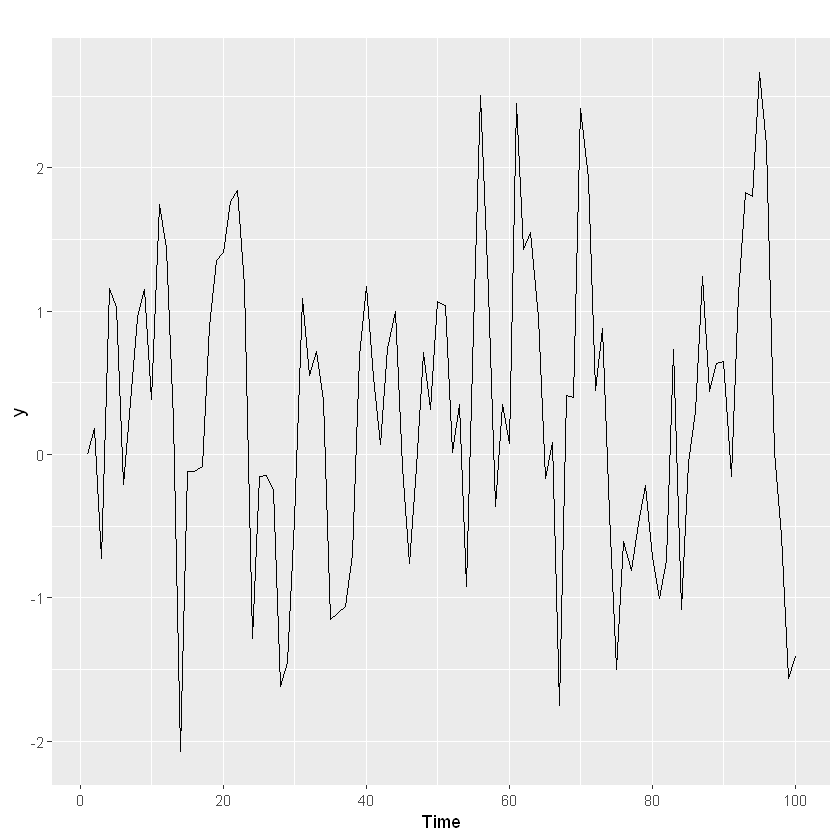

In [3]:
# a. 다음의 R 코드를 이용하여,  Φ_1 = 0.6 이고  σ^2 = 1 인 AR(1) 모델로 데이터를 생성해봅시다.
# 생성 과정은  y_1 = 0  에서 시작합니다. Autoregressive 
set.seed(1)

y <- ts(numeric(100))
e <- rnorm(100)

for(i in 2:100){
    y[i] <- 0.6 * y[i - 1] + e[i]
}

print(y)
autoplot(y)

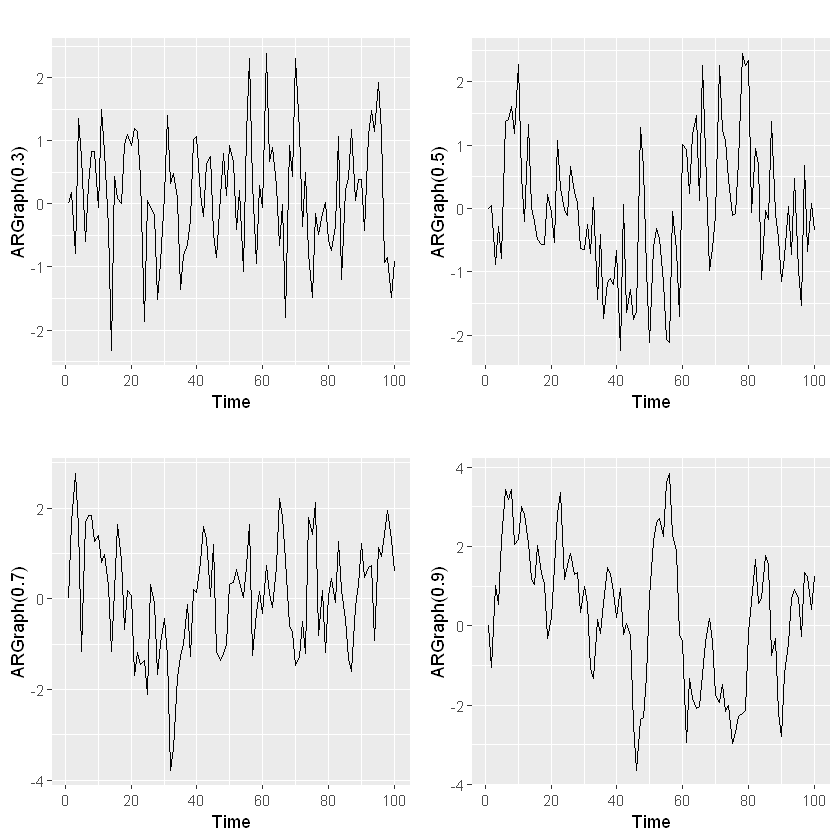

In [4]:
# b. 시계열에 대한 시간 그래프를 그려봅시다. Φ_1  이 변하면 그래프가 어떻게 변합니까?
set.seed(1)

ARGraph <- function(phi) {
    y <- ts(numeric(100))
    e <- rnorm(100)

    for(i in 2:100){
        y[i] <- phi * y[i - 1] + e[i]
    }
    
    return (y)
}

p1 <- autoplot(ARGraph(0.3))
p2 <- autoplot(ARGraph(0.5))
p3 <- autoplot(ARGraph(0.7))
p4 <- autoplot(ARGraph(0.9))

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 4)))

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  0.000000000 -0.192228962 -0.725442618  1.093903635  1.286676253
  [6] -0.622763721 -0.004851978  1.030782137  1.018776175  0.040080424
 [11]  1.328548136  1.296911937 -0.387334639 -2.587444236 -0.203889014
 [16]  0.630024942 -0.043150429  0.934122053  1.387522922  1.086634038
 [21]  1.275318164  1.333522724  0.543846764 -1.944612706 -0.573785270
 [26]  0.315766709 -0.189472750 -1.564229688 -1.360601485  0.131051527
 [31]  1.609444488  0.712420004  0.325998975  0.178797926 -1.409342581
 [36] -1.241230297 -0.643286692 -0.295887369  1.064437334  1.423190972
 [41]  0.293381853 -0.352075838  0.544946367  0.974841224 -0.354757775
 [46] -1.120748574 -0.059915132  0.987282102  0.348773543  0.813699999
 [51]  0.926770516 -0.373162865 -0.026096145 -0.924691281  0.755405844
 [56]  2.840214120  0.821018463 -1.264467512 -0.056761148  0.206777173
 [61]  2.320584998  1.401730654  0.666195361  0.441845776 -0.726471914
 [66] -0.257171626 -1.69168

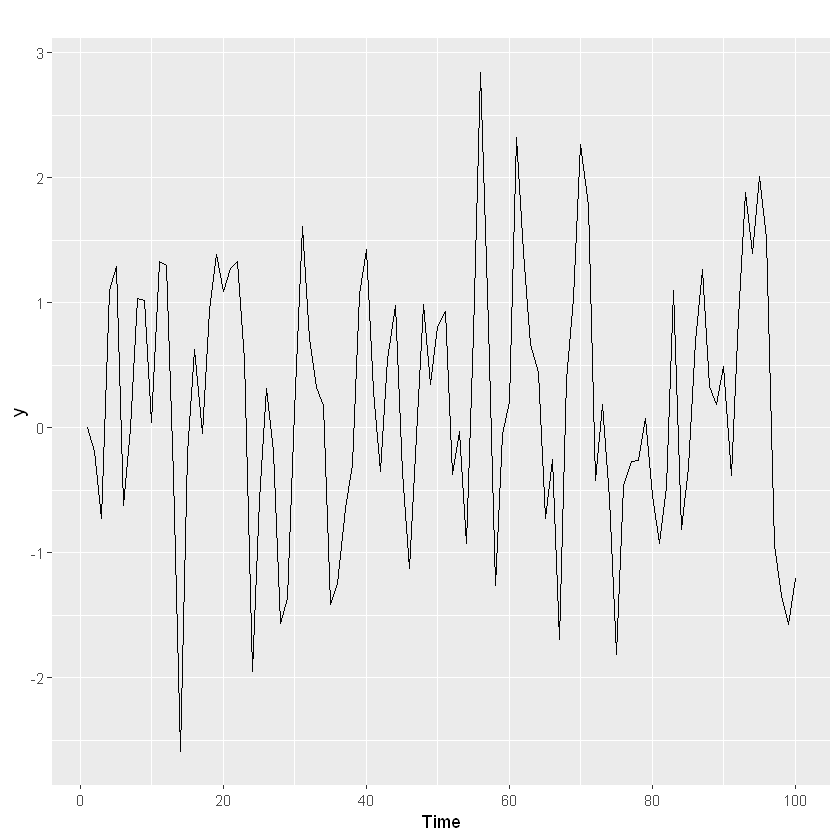

In [5]:
# c. θ_1 = 0.6  와 σ^2 = 1  인 MA(1) 모델에서 데이터를 생성하는 코드를 작성해봅시다.
set.seed(1)

y <- ts(numeric(100))
e <- rnorm(100)

for(i in 2:100){
    y[i] <- 0.6 * e[i - 1] + e[i]
}

print(y)
autoplot(y)

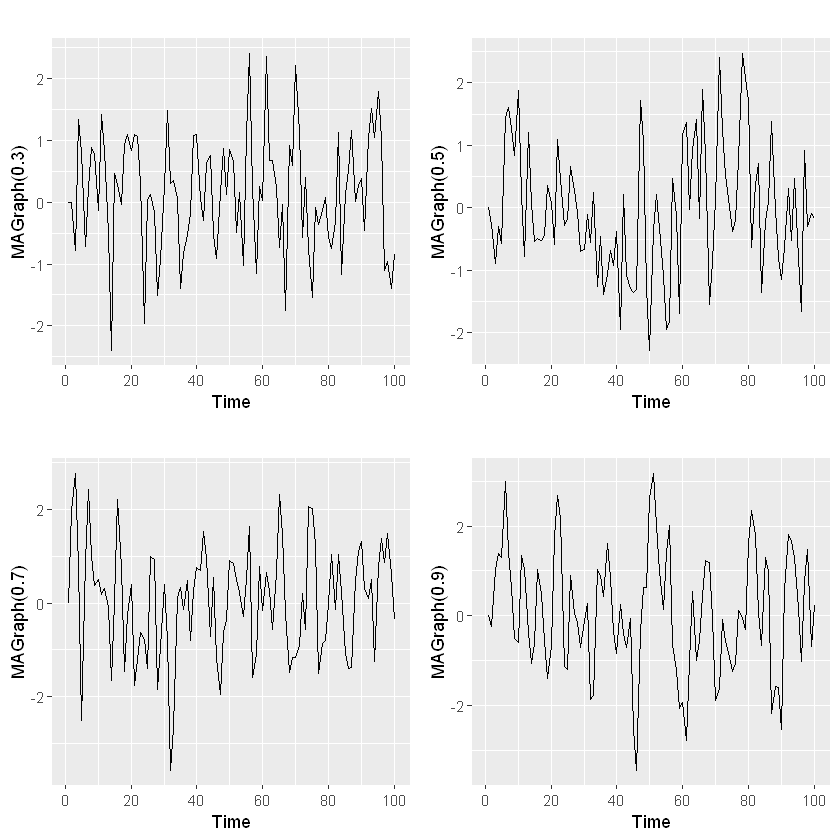

In [6]:
# d. 생성한 시계열에 대한 시간 그래프를 그려봅시다. θ_1  이 변하면 그래프가 어떻게 바뀝니까?
set.seed(1)

MAGraph <- function(theta) {
    y <- ts(numeric(100))
    e <- rnorm(100)

    for(i in 2:100){
        y[i] <- theta * e[i - 1] + e[i]
    }
    
    return (y)
}

p1 <- autoplot(MAGraph(0.3))
p2 <- autoplot(MAGraph(0.5))
p3 <- autoplot(MAGraph(0.7))
p4 <- autoplot(MAGraph(0.9))

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 4)))

In [7]:
# e.Φ_1 = 0.6, θ_1 = 0.6, σ^2 = 1 인 ARMA(1,1) 모델로 데이터를 생성해봅시다.
set.seed(1)

ARMA11 <- ts(numeric(100))
e <- rnorm(100)

for(i in 2:100){
   ARMA11[i] <- 0.6 * ARMA11[i - 1] + 0.6 * e[i - 1] + e[i]
}

print(ARMA11)
p1 <- autoplot(ARMA11)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  0.00000000 -0.19222896 -0.84078000  0.58943564  1.64033764  0.36143886
  [7]  0.21201134  1.15798894  1.71356954  1.06822215  1.96948142  2.47860079
 [13]  1.09982584 -1.92754873 -1.36041825 -0.18622601 -0.15488603  0.84119043
 [19]  1.89223718  2.22197635  2.60850397  2.89862511  2.28302183 -0.57479961
 [25] -0.91866504 -0.23543231 -0.33073214 -1.76266897 -2.41820287 -1.31987019
 [31]  0.81752237  1.20293343  1.04775903  0.80745334 -0.92487057 -1.79615264
 [37] -1.72097828 -1.32847434  0.26735273  1.58360261  1.24354342  0.39405021
 [43]  0.78137650  1.44366712  0.51144250 -0.81388308 -0.54824498  0.65833512
 [49]  0.74377461  1.25996477  1.68274938  0.63648676  0.35579591 -0.71121373
 [55]  0.32867760  3.03742068  2.64347087  0.32161501  0.13620786  0.28850189
 [61]  2.49368613  2.89794233  2.40496076  1.88482223  0.40442143 -0.01451877
 [67] -1.70039451 -0.63765702  0.64999204  2.65455890  3.37181187  1.59844641
 [73]  1.14382

In [8]:
#f. Φ_1 = -0.8 , Φ_2 = 0.3 , σ^2 = 1 인 AR(2) 모델로 데이터를 생성해봅시다.
# (이러한 매개변수가 정상성을 나타내지 않는 시계열을 만들 것이라는 사실에 주목합시다.)
set.seed(1)

AR2 <- ts(numeric(100))
e <- rnorm(100)

for(i in 3:100){
    AR2[i] <- (-0.8) * AR2[i - 1] + 0.3 * AR2[i - 2] + e[i]
}

print(AR2)
p2 <- autoplot(AR2)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]  0.000000e+00  0.000000e+00 -8.356286e-01  2.263784e+00 -1.732208e+00
  [6]  1.244433e+00 -1.027780e+00  1.933878e+00 -1.279655e+00  1.298499e+00
 [11]  8.908523e-02  7.081248e-01 -1.161015e+00 -1.073451e+00  1.635387e+00
 [16] -1.675278e+00  1.814648e+00 -1.010466e+00  2.173989e+00 -1.448429e+00
 [21]  2.729917e+00 -1.836326e+00  2.362601e+00 -4.430331e+00  4.872871e+00
 [26] -5.283525e+00  5.532885e+00 -7.482118e+00  7.167410e+00 -7.560622e+00
 [31]  9.557400e+00 -1.001689e+01  1.126841e+01 -1.207360e+01  1.166234e+01
 [36] -1.336695e+01  1.379797e+01 -1.510777e+01  1.732564e+01 -1.762967e+01
 [41]  1.913690e+01 -2.085178e+01  2.311946e+01 -2.419444e+01  2.560263e+01
 [46] -2.844793e+01  3.080372e+01 -3.240882e+01  3.505582e+01 -3.688620e+01
 [51]  4.042381e+01 -4.401693e+01  4.768181e+01 -5.247989e+01  5.772148e+01
 [56] -5.994075e+01  6.490182e+01 -7.094782e+01  7.679852e+01 -8.285822e+01
 [61]  9.172775e+01 -9.827891e+01  1.0

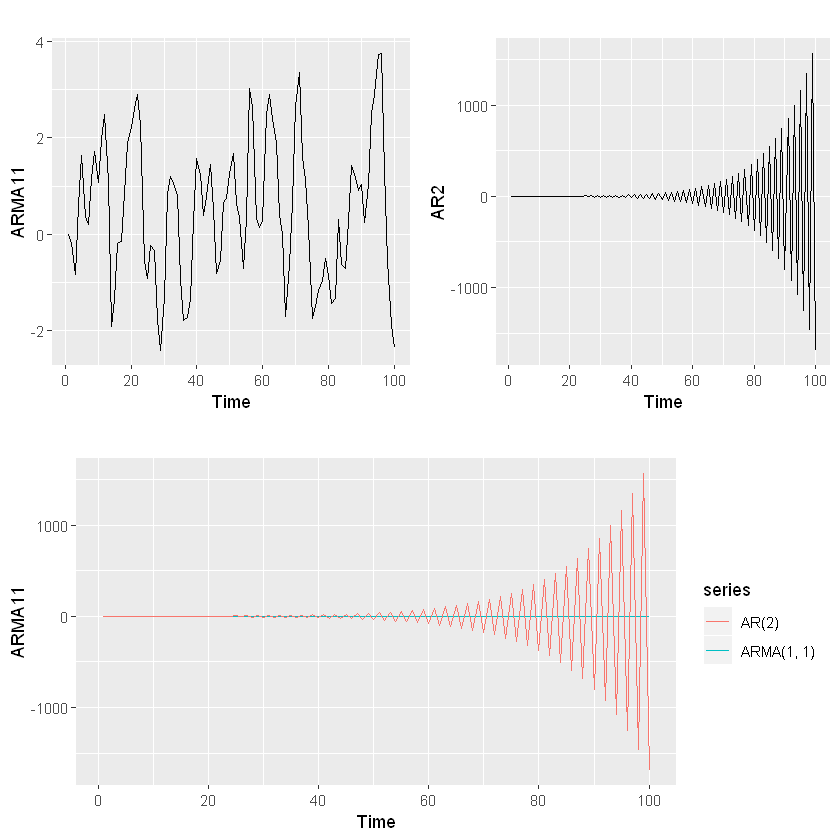

In [9]:
# g. 이전 두 시계열을 그려서 비교해봅시다.

p3 <- autoplot(ARMA11, series = "ARMA(1, 1)") + autolayer(AR2, series = "AR(2)")

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 3)))

In [10]:
# e.Φ_1 = 0.6, θ_1 = 0.6, σ^2 = 1 인 ARMA(1,1) 모델로 데이터를 생성해봅시다.
set.seed(1)

ARMA11 <- ts(numeric(40))
e <- rnorm(40)

for(i in 2:40){
   ARMA11[i] <- 0.6 * ARMA11[i - 1] + 0.6 * e[i - 1] + e[i]
}

print(ARMA11)
p1 <- autoplot(ARMA11)

Time Series:
Start = 1 
End = 40 
Frequency = 1 
 [1]  0.0000000 -0.1922290 -0.8407800  0.5894356  1.6403376  0.3614389
 [7]  0.2120113  1.1579889  1.7135695  1.0682221  1.9694814  2.4786008
[13]  1.0998258 -1.9275487 -1.3604183 -0.1862260 -0.1548860  0.8411904
[19]  1.8922372  2.2219763  2.6085040  2.8986251  2.2830218 -0.5747996
[25] -0.9186650 -0.2354323 -0.3307321 -1.7626690 -2.4182029 -1.3198702
[31]  0.8175224  1.2029334  1.0477590  0.8074533 -0.9248706 -1.7961526
[37] -1.7209783 -1.3284743  0.2673527  1.5836026


In [11]:
#f. Φ_1 = -0.8 , Φ_2 = 0.3 , σ^2 = 1 인 AR(2) 모델로 데이터를 생성해봅시다.
# (이러한 매개변수가 정상성을 나타내지 않는 시계열을 만들 것이라는 사실에 주목합시다.)
set.seed(1)

AR2 <- ts(numeric(40))
e <- rnorm(40)

for(i in 3:40){
    AR2[i] <- (-0.8) * AR2[i - 1] + 0.3 * AR2[i - 2] + e[i]
}

print(AR2)
p2 <- autoplot(AR2)

Time Series:
Start = 1 
End = 40 
Frequency = 1 
 [1]   0.00000000   0.00000000  -0.83562861   2.26378369  -1.73220777
 [6]   1.24443294  -1.02777963   1.93387829  -1.27965517   1.29849923
[11]   0.08908523   0.70812482  -1.16101487  -1.07345055   1.63538690
[16]  -1.67527829   1.81464844  -1.01046603   2.17398855  -1.44842933
[21]   2.72991740  -1.83632642   2.36260134  -4.43033069   4.87287070
[26]  -5.28352451   5.53288531  -7.48211798   7.16740992  -7.56062177
[31]   9.55739995 -10.01689422  11.26840697 -12.07359888  11.66234164
[36] -13.36694754  13.79797057 -15.10777412  17.32563584 -17.62966515


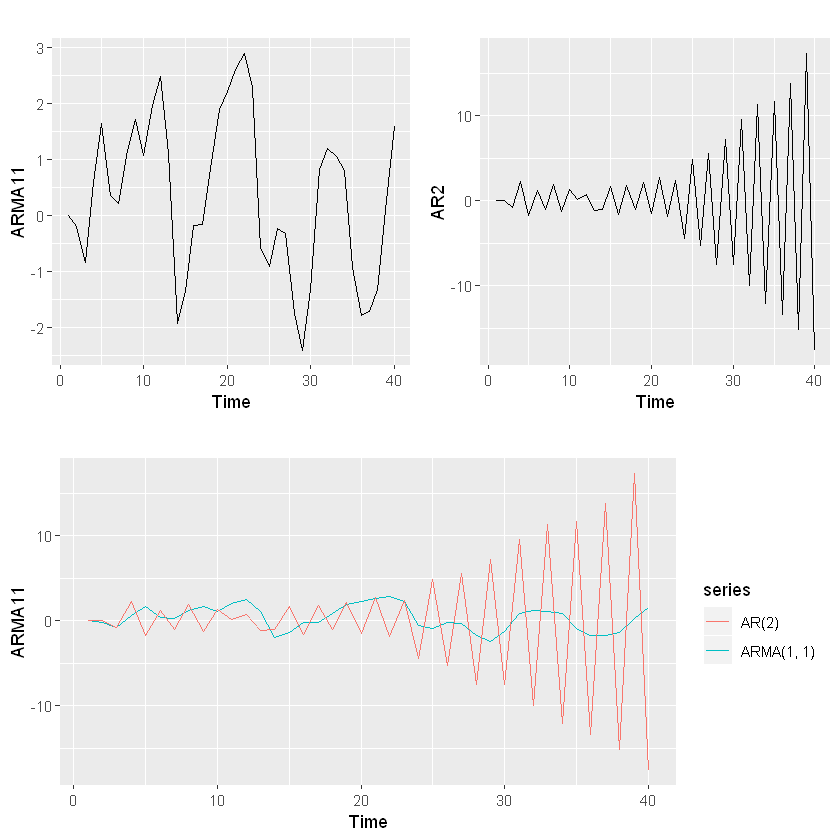

In [12]:
# g. 이전 두 시계열을 그려서 비교해봅시다.

p3 <- autoplot(ARMA11, series = "ARMA(1, 1)") + autolayer(AR2, series = "AR(2)")

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 3)))